Data Loading, Storage and File Formats
Problem Statement: Analyzing Sales Data from Multiple. The
goal is to load and analyze sales data from different file formats,
including CSV, Excel, and JSON, and perform data cleaning,
transformation, and analysis on the dataset.

# Importing Necessary Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Reading Data

In [6]:
csv_data = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\CL 1\CL 1\Datasets 1\Dataset Lambture\DMV\Sales Data\sales data.csv")
excel_data = pd.read_excel("format2.xlsx")
json_data = pd.read_json("format3.json")

In [7]:
csv_data.head(1)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1


In [8]:
excel_data.head(1)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Normal,Male,Electronic accessories,51.69,7,18.0915,379.9215,1/26/2019,18:22,Cash,361.83,4.761905,18.0915,5.5


In [9]:
json_data.head(1)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
701,B,Mandalay,Normal,Male,Food and beverages,32.32,3,4.848,101.808,2019-03-27,19:11,Credit card,96.96,4.761905,4.848,4.3


In [10]:
df = pd.concat([csv_data, excel_data, json_data])
df.sample(3)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
968,A,Yangon,Normal,Female,Health and beauty,15.80,3,2.370,49.770,2019-03-25 00:00:00,18:02,Cash,47.40,4.761905,2.370,9.5
332,A,Yangon,Member,Male,Fashion accessories,21.48,2,2.148,45.108,2/27/2019,12:22,Ewallet,42.96,4.761905,2.148,6.6
105,A,Yangon,Member,Male,Electronic accessories,88.67,10,44.335,931.035,1/12/2019,14:50,Ewallet,886.70,4.761905,44.335,7.3


In [11]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income             1000 

In [17]:
# df.fillna(df.mean(), inplace=True)
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)


# Data Transformation

In [19]:
# df["Date"] = pd.to_datetime(df["Date"])
# df["Time"] = pd.to_datetime(df["Time"])
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S").dt.time


In [20]:
df.head()


,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [21]:
df.dtypes

Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

# Data Cleaning

In [22]:
df.isna().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [23]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


# Data Analysis

In [24]:
total_sales = df['Total'].sum()
total_sales

322966.749

In [25]:
average_order_value = df.groupby('Gender')['Total'].mean()
average_order_value

Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64

In [26]:
product_category_distribution = df['Product line'].value_counts()
product_category_distribution

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [27]:
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

# Data Visualization

<Axes: >

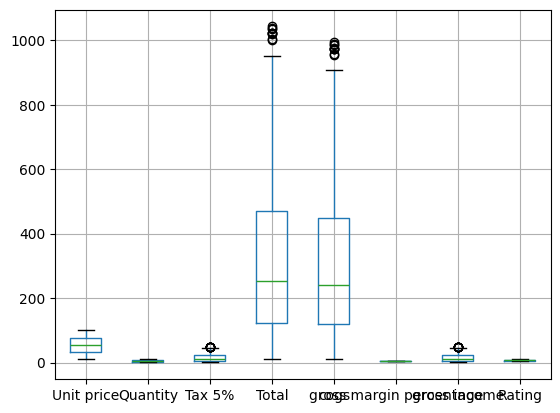

In [28]:
df.boxplot()

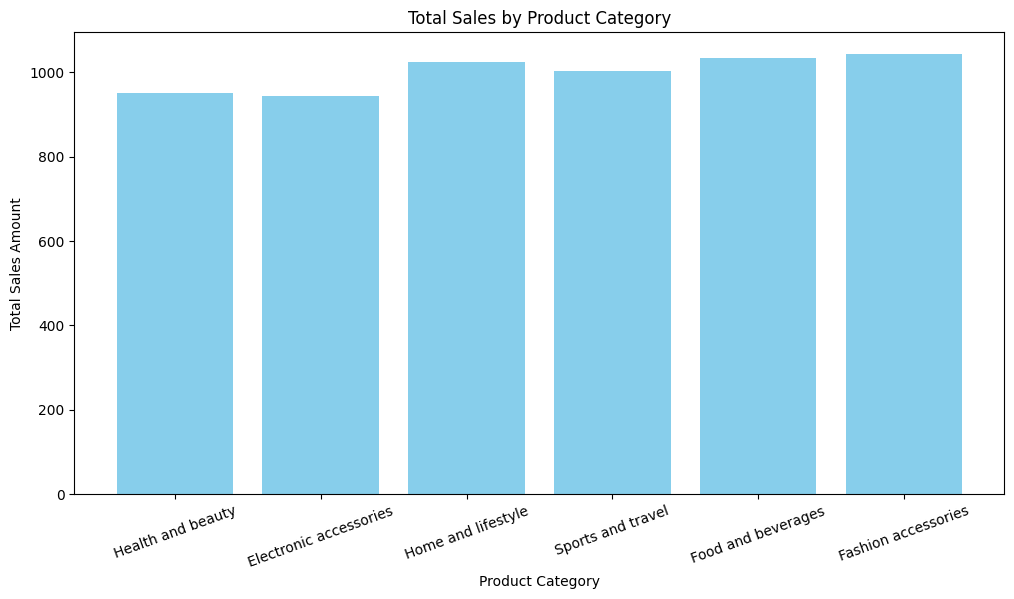

In [29]:
plt.figure(figsize=(12, 6))
plt.bar(df['Product line'], df['Total'], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales by Product Category')
plt.xticks(rotation=20)
plt.show()